# **Visualization:**

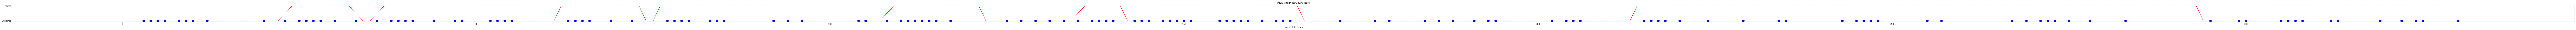

In [5]:
import matplotlib.pyplot as plt

def visualize_secondary_structure(dot_bracket):
    # Initialize lists to store unpaired and paired bases
    unpaired_bases = []
    paired_bases = []

    # Parse the dot-bracket notation
    for i, char in enumerate(dot_bracket):
        if char == '.':
            unpaired_bases.append((i + 1, 0))  # Add unpaired base with y-coordinate 0
        elif char == '(':
            paired_bases.append((i + 1, 0))  # Add opening parenthesis with y-coordinate 0
        elif char == ')':
            paired_bases[-1] = (paired_bases[-1][0], 1)  # Change y-coordinate of the last opening parenthesis to 1
            paired_bases.append((i + 1, 1))  # Add closing parenthesis with y-coordinate 1

    # Plot the secondary structure
    plt.figure(figsize=(len(dot_bracket) / 2, 2))
    plt.title("RNA Secondary Structure")
    plt.xlabel("Nucleotide Index")
    plt.yticks([0, 1], ['Unpaired', 'Paired'])

    # Plot unpaired bases
    for base in unpaired_bases:
        plt.plot(base[0], base[1], 'o', color='blue', markersize=10)

    # Plot base pairs
    for i in range(0, len(paired_bases), 2):
        x = [paired_bases[i][0], paired_bases[i + 1][0]]
        y = [paired_bases[i][1], paired_bases[i + 1][1]]
        plt.plot(x, y, color='red')

    plt.tight_layout()
    plt.show()

# Example usage:
dot_bracket = "((....(...(.(((((((.((.(....).)).((.(....)).((..(((....)((((((....)).)).)(((....))...)))))).(.(.(((((((..((.(......).))))(((.(.(.(.(.(.(....)(...(.....))(.....).)...)(((((.((((.(.((((.(.(.((.(..(((((((.(...((((((((....).))).)))).))))..))))))).(....)))))).).))))))))).).)...).)).)))).))))))))))(.(((..((((....)))..))))).)).)..))))."
visualize_secondary_structure(dot_bracket)


# **Testcase analysis:**

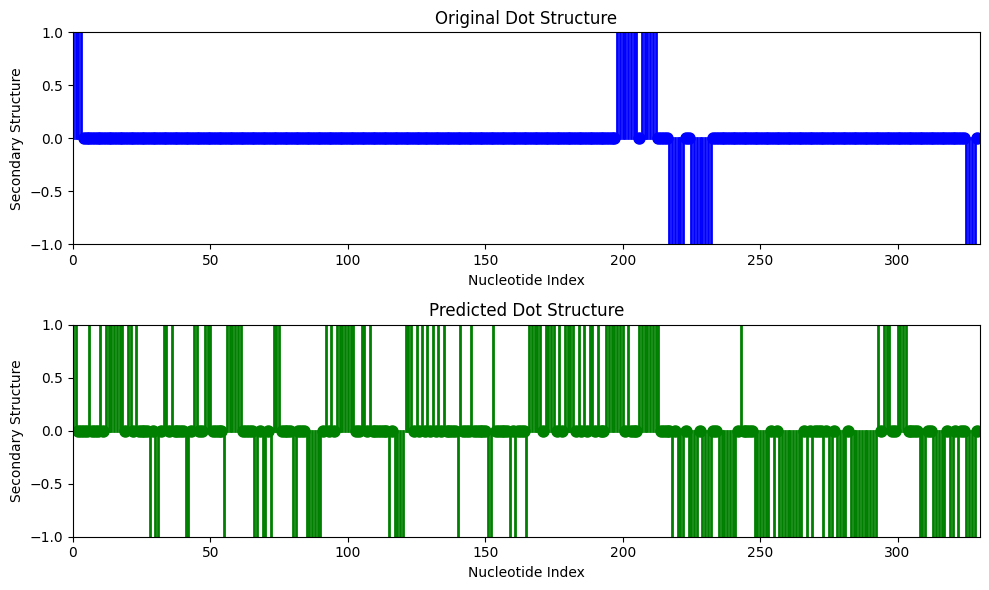

Similarity Score: 57


In [ ]:
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

def dot_bracket_to_tree(dot_bracket):
    stack = []
    root = TreeNode(None)
    current_node = root

    for char in dot_bracket:
        if char == '(':
            new_node = TreeNode(None)
            current_node.children.append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif char == ')':
            current_node = stack.pop()
        else:  # Unpaired base
            current_node.children.append(TreeNode(char))

    return root

def print_tree(node, depth=0):
    if node is None:
        return
    print("  " * depth + str(node.value))
    for child in node.children:
        print_tree(child, depth + 1)

def compare_dot_structures(original_dot_structure, predicted_dot_structure):
    if len(original_dot_structure) != len(predicted_dot_structure):
        raise ValueError("Dot structures must have the same length")

    score = 0
    for orig_char, pred_char in zip(original_dot_structure, predicted_dot_structure):
        if orig_char == '.' and pred_char == '.':
            score += 1  # Both are unpaired
        elif orig_char == '(' and pred_char == '(':
            score += 1  # Both are opening parentheses
        elif orig_char == ')' and pred_char == ')':
            score += 1  # Both are closing parentheses
        elif orig_char == '(' and pred_char == ')':
            score += 1  # Matching base pair
        elif orig_char == '.' and pred_char == '(':
            score -= 1  # Mismatched base pair or unpaired base
        elif orig_char == '(' and pred_char == '.':
            score -= 1  # Mismatched base pair or unpaired base

    return score

def plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure):
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))

    # Plot original dot structure
    ax[0].set_title("Original Dot Structure")
    ax[0].set_xlabel("Nucleotide Index")
    ax[0].set_ylabel("Secondary Structure")
    ax[0].set_xlim(0, len(original_dot_structure))
    ax[0].set_ylim(-1, 1)
    for i, char in enumerate(original_dot_structure):
        if char == '(':
            ax[0].plot([i, i], [0, 1], color='blue', linewidth=2)
        elif char == ')':
            ax[0].plot([i, i], [0, -1], color='blue', linewidth=2)
        elif char == '.':
            ax[0].plot(i, 0, 'o', color='blue', markersize=8)

    # Plot predicted dot structure
    ax[1].set_title("Predicted Dot Structure")
    ax[1].set_xlabel("Nucleotide Index")
    ax[1].set_ylabel("Secondary Structure")
    ax[1].set_xlim(0, len(predicted_dot_structure))
    ax[1].set_ylim(-1, 1)
    for i, char in enumerate(predicted_dot_structure):
        if char == '(':
            ax[1].plot([i, i], [0, 1], color='green', linewidth=2)
        elif char == ')':
            ax[1].plot([i, i], [0, -1], color='green', linewidth=2)
        elif char == '.':
            ax[1].plot(i, 0, 'o', color='green', markersize=8)

    plt.tight_layout()
    plt.show()

# Example usage:
original_dot_structure = "((((..................................................................................................................................................................................................((((((((.((((((....))))))..))))))))............................................................................................))))."
predicted_dot_structure = "((....(...(.(((((((.((.(....).)).((.(....)).((..(((....)((((((....)).)).)(((....))...)))))).(.(.(((((((..((.(......).))))(((.(.(.(.(.(.(....)(...(.....))(.....).)...)(((((.((((.(.((((.(.(.((.(..(((((((.(...((((((((....).))).)))).))))..))))))).(....)))))).).))))))))).).)...).)).)))).))))))))))(.(((..((((....)))..))))).)).)..))))."
plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure)

# Calculate similarity score
if len(original_dot_structure) == len(predicted_dot_structure):
    similarity_score = compare_dot_structures(original_dot_structure, predicted_dot_structure)
    print("Similarity Score:", similarity_score)
else:
    print("Dot structures must have the same length for comparison.")


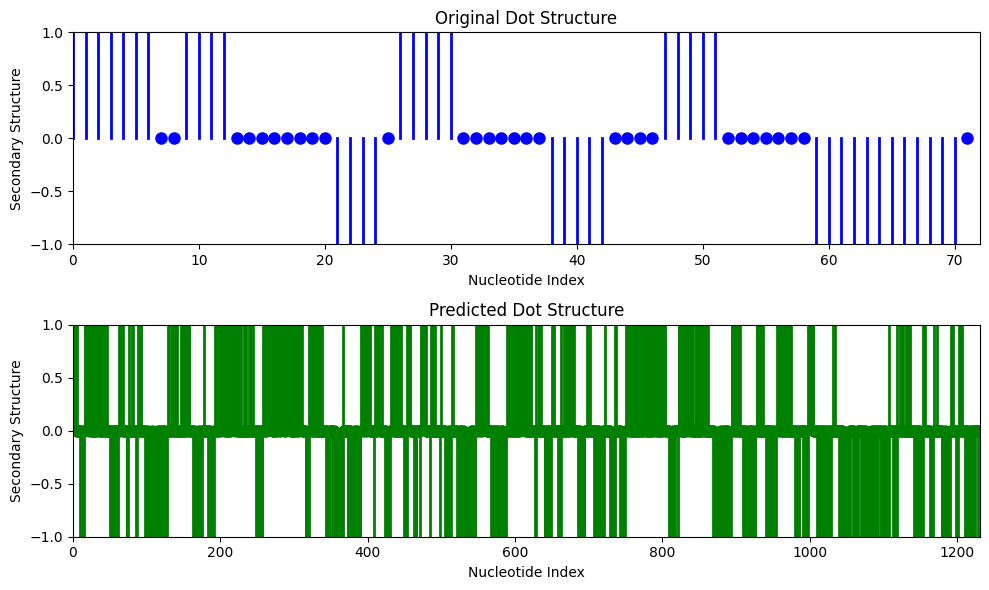

Dot structures must have the same length for comparison.


In [1]:
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

def dot_bracket_to_tree(dot_bracket):
    stack = []
    root = TreeNode(None)
    current_node = root

    for char in dot_bracket:
        if char == '(':
            new_node = TreeNode(None)
            current_node.children.append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif char == ')':
            current_node = stack.pop()
        else:  # Unpaired base
            current_node.children.append(TreeNode(char))

    return root

def print_tree(node, depth=0):
    if node is None:
        return
    print("  " * depth + str(node.value))
    for child in node.children:
        print_tree(child, depth + 1)

def compare_dot_structures(original_dot_structure, predicted_dot_structure):
    if len(original_dot_structure) != len(predicted_dot_structure):
        raise ValueError("Dot structures must have the same length")

    score = 0
    for orig_char, pred_char in zip(original_dot_structure, predicted_dot_structure):
        if orig_char == '.' and pred_char == '.':
            score += 1  # Both are unpaired
        elif orig_char == '(' and pred_char == '(':
            score += 1  # Both are opening parentheses
        elif orig_char == ')' and pred_char == ')':
            score += 1  # Both are closing parentheses
        elif orig_char == '(' and pred_char == ')':
            score += 1  # Matching base pair
        elif orig_char == '.' and pred_char == '(':
            score -= 1  # Mismatched base pair or unpaired base
        elif orig_char == '(' and pred_char == '.':
            score -= 1  # Mismatched base pair or unpaired base

    return score

def plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure):
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))

    # Plot original dot structure
    ax[0].set_title("Original Dot Structure")
    ax[0].set_xlabel("Nucleotide Index")
    ax[0].set_ylabel("Secondary Structure")
    ax[0].set_xlim(0, len(original_dot_structure))
    ax[0].set_ylim(-1, 1)
    for i, char in enumerate(original_dot_structure):
        if char == '(':
            ax[0].plot([i, i], [0, 1], color='blue', linewidth=2)
        elif char == ')':
            ax[0].plot([i, i], [0, -1], color='blue', linewidth=2)
        elif char == '.':
            ax[0].plot(i, 0, 'o', color='blue', markersize=8)

    # Plot predicted dot structure
    ax[1].set_title("Predicted Dot Structure")
    ax[1].set_xlabel("Nucleotide Index")
    ax[1].set_ylabel("Secondary Structure")
    ax[1].set_xlim(0, len(predicted_dot_structure))
    ax[1].set_ylim(-1, 1)
    for i, char in enumerate(predicted_dot_structure):
        if char == '(':
            ax[1].plot([i, i], [0, 1], color='green', linewidth=2)
        elif char == ')':
            ax[1].plot([i, i], [0, -1], color='green', linewidth=2)
        elif char == '.':
            ax[1].plot(i, 0, 'o', color='green', markersize=8)

    plt.tight_layout()
    plt.show()

# Example usage:
original_dot_structure = "(((((((..((((........)))).(((((.......)))))....(((((.......))))))))))))."
predicted_dot_structure = "((((((....)))).)(((((((.(((.(.((.((((.(.(.((.((....))).).)..))(.(((((....)))(...((....)).(.(((....))).))))).))))))).)).)))..)))))(.(..(((.(.((.....(.(((.(.((((....)).))))).))))..(.....).))))).)(.(.(((.((((((.(.(.(.((((((((.(((..(...(.((...(.((((....)).).).))(.((.(((((((((..(.(((((.((((((.(((((((..(.(.((((.(((((....)))))((((.((.(.(((.(..(....).))))..).).))))))))))))(.....))..)))))).)).))))(.(((((.(((((....).(..(((((.(....)))))).)((((.(..((..((....))))(((((....))))....)((((((((....).(.((..(.....)(.....))))).)))(.(....)))).).).)))))))))))..))))(.(((((.(((((((.(....)).)))..)))))..))))))((.(.(((..(.(.(((.((((((((.(..(.((....))(..((.(....))).).).))(.((....)..))(..(.(..((.((((.((....)..)))))))..(..(((....).)).).))))).))(......)))))))((....).)))))).(((((.((..((.(.(.(((..(((((.((..(.((.((((.(((..(.(((((....))))).)))...)((((..(..(((((((.((.(..((.((..(.((((.(..(.....).)))))))))).)).))..))))))((.(((.(.(((....)).)))).).)).)))).(((.(.(.(....)).).).)).)))).(((((.(..((.((.(.(.(....)).))))....).).)))((((((((....))).).).)).))).))).).(..(.....)..).))))))))))...).))))))...).).)).)))))))).)).).)))...)))).).)))))(....)).).)(...(((.(..(.(.(.(....)..)))..)))))((.(.....))))).(..(......)))).))))))).(((....)))(.(((....)).)))).)))..)...).."
plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure)

# Calculate similarity score
if len(original_dot_structure) == len(predicted_dot_structure):
    similarity_score = compare_dot_structures(original_dot_structure, predicted_dot_structure)
    print("Similarity Score:", similarity_score)
else:
    print("Dot structures must have the same length for comparison.")


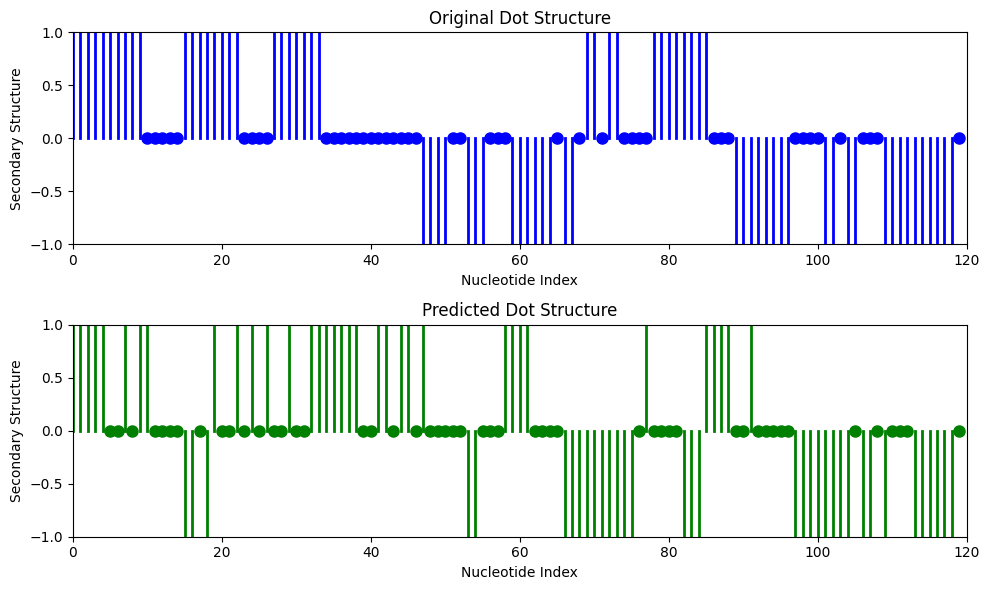

Similarity Score: 24


In [2]:
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

def dot_bracket_to_tree(dot_bracket):
    stack = []
    root = TreeNode(None)
    current_node = root

    for char in dot_bracket:
        if char == '(':
            new_node = TreeNode(None)
            current_node.children.append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif char == ')':
            current_node = stack.pop()
        else:  # Unpaired base
            current_node.children.append(TreeNode(char))

    return root

def print_tree(node, depth=0):
    if node is None:
        return
    print("  " * depth + str(node.value))
    for child in node.children:
        print_tree(child, depth + 1)

def compare_dot_structures(original_dot_structure, predicted_dot_structure):
    if len(original_dot_structure) != len(predicted_dot_structure):
        raise ValueError("Dot structures must have the same length")

    score = 0
    for orig_char, pred_char in zip(original_dot_structure, predicted_dot_structure):
        if orig_char == '.' and pred_char == '.':
            score += 1  # Both are unpaired
        elif orig_char == '(' and pred_char == '(':
            score += 1  # Both are opening parentheses
        elif orig_char == ')' and pred_char == ')':
            score += 1  # Both are closing parentheses
        elif orig_char == '(' and pred_char == ')':
            score += 1  # Matching base pair
        elif orig_char == '.' and pred_char == '(':
            score -= 1  # Mismatched base pair or unpaired base
        elif orig_char == '(' and pred_char == '.':
            score -= 1  # Mismatched base pair or unpaired base

    return score

def plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure):
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))

    # Plot original dot structure
    ax[0].set_title("Original Dot Structure")
    ax[0].set_xlabel("Nucleotide Index")
    ax[0].set_ylabel("Secondary Structure")
    ax[0].set_xlim(0, len(original_dot_structure))
    ax[0].set_ylim(-1, 1)
    for i, char in enumerate(original_dot_structure):
        if char == '(':
            ax[0].plot([i, i], [0, 1], color='blue', linewidth=2)
        elif char == ')':
            ax[0].plot([i, i], [0, -1], color='blue', linewidth=2)
        elif char == '.':
            ax[0].plot(i, 0, 'o', color='blue', markersize=8)

    # Plot predicted dot structure
    ax[1].set_title("Predicted Dot Structure")
    ax[1].set_xlabel("Nucleotide Index")
    ax[1].set_ylabel("Secondary Structure")
    ax[1].set_xlim(0, len(predicted_dot_structure))
    ax[1].set_ylim(-1, 1)
    for i, char in enumerate(predicted_dot_structure):
        if char == '(':
            ax[1].plot([i, i], [0, 1], color='green', linewidth=2)
        elif char == ')':
            ax[1].plot([i, i], [0, -1], color='green', linewidth=2)
        elif char == '.':
            ax[1].plot(i, 0, 'o', color='green', markersize=8)

    plt.tight_layout()
    plt.show()

# Example usage:
original_dot_structure = "((((((((((.....((((((((....(((((((.............))))..)))...)))))).)).((.((....((((((((...))))))))....)).))...))))))))))."
predicted_dot_structure = "(((((..(.((....)).)(..(.(.(..(..(((((((..((.((.(.....))...((((....)))))))))).(....)))((((..(.....)))))))).)).)...))))))."
plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure)

# Calculate similarity score
if len(original_dot_structure) == len(predicted_dot_structure):
    similarity_score = compare_dot_structures(original_dot_structure, predicted_dot_structure)
    print("Similarity Score:", similarity_score)
else:
    print("Dot structures must have the same length for comparison.")


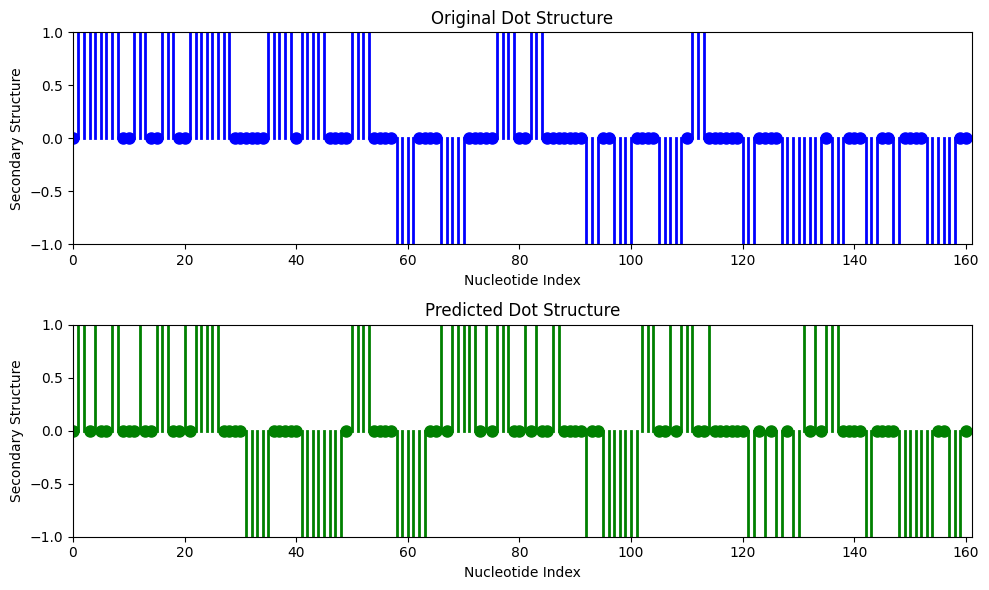

Similarity Score: 53


In [3]:
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

def dot_bracket_to_tree(dot_bracket):
    stack = []
    root = TreeNode(None)
    current_node = root

    for char in dot_bracket:
        if char == '(':
            new_node = TreeNode(None)
            current_node.children.append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif char == ')':
            current_node = stack.pop()
        else:  # Unpaired base
            current_node.children.append(TreeNode(char))

    return root

def print_tree(node, depth=0):
    if node is None:
        return
    print("  " * depth + str(node.value))
    for child in node.children:
        print_tree(child, depth + 1)

def compare_dot_structures(original_dot_structure, predicted_dot_structure):
    if len(original_dot_structure) != len(predicted_dot_structure):
        raise ValueError("Dot structures must have the same length")

    score = 0
    for orig_char, pred_char in zip(original_dot_structure, predicted_dot_structure):
        if orig_char == '.' and pred_char == '.':
            score += 1  # Both are unpaired
        elif orig_char == '(' and pred_char == '(':
            score += 1  # Both are opening parentheses
        elif orig_char == ')' and pred_char == ')':
            score += 1  # Both are closing parentheses
        elif orig_char == '(' and pred_char == ')':
            score += 1  # Matching base pair
        elif orig_char == '.' and pred_char == '(':
            score -= 1  # Mismatched base pair or unpaired base
        elif orig_char == '(' and pred_char == '.':
            score -= 1  # Mismatched base pair or unpaired base

    return score

def plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure):
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))

    # Plot original dot structure
    ax[0].set_title("Original Dot Structure")
    ax[0].set_xlabel("Nucleotide Index")
    ax[0].set_ylabel("Secondary Structure")
    ax[0].set_xlim(0, len(original_dot_structure))
    ax[0].set_ylim(-1, 1)
    for i, char in enumerate(original_dot_structure):
        if char == '(':
            ax[0].plot([i, i], [0, 1], color='blue', linewidth=2)
        elif char == ')':
            ax[0].plot([i, i], [0, -1], color='blue', linewidth=2)
        elif char == '.':
            ax[0].plot(i, 0, 'o', color='blue', markersize=8)

    # Plot predicted dot structure
    ax[1].set_title("Predicted Dot Structure")
    ax[1].set_xlabel("Nucleotide Index")
    ax[1].set_ylabel("Secondary Structure")
    ax[1].set_xlim(0, len(predicted_dot_structure))
    ax[1].set_ylim(-1, 1)
    for i, char in enumerate(predicted_dot_structure):
        if char == '(':
            ax[1].plot([i, i], [0, 1], color='green', linewidth=2)
        elif char == ')':
            ax[1].plot([i, i], [0, -1], color='green', linewidth=2)
        elif char == '.':
            ax[1].plot(i, 0, 'o', color='green', markersize=8)

    plt.tight_layout()
    plt.show()

# Example usage:
original_dot_structure = ".((((((((..(((..(((..((((((((......(((((.(((((....((((....))))....))))).....((((..(((.......)))..))))....))))).(((......)))....)))))))).)))...)))..))....)))))).."
predicted_dot_structure = ".((.(..((...(..(((..(.(((((....))))).....)))))))).((((....))))))..(.(((((.(.(((..(.(..((....)..)))))))(((..(.(((..(......)).).)).))(.(.(((....))....)))))))..)))."
plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure)

# Calculate similarity score
if len(original_dot_structure) == len(predicted_dot_structure):
    similarity_score = compare_dot_structures(original_dot_structure, predicted_dot_structure)
    print("Similarity Score:", similarity_score)
else:
    print("Dot structures must have the same length for comparison.")


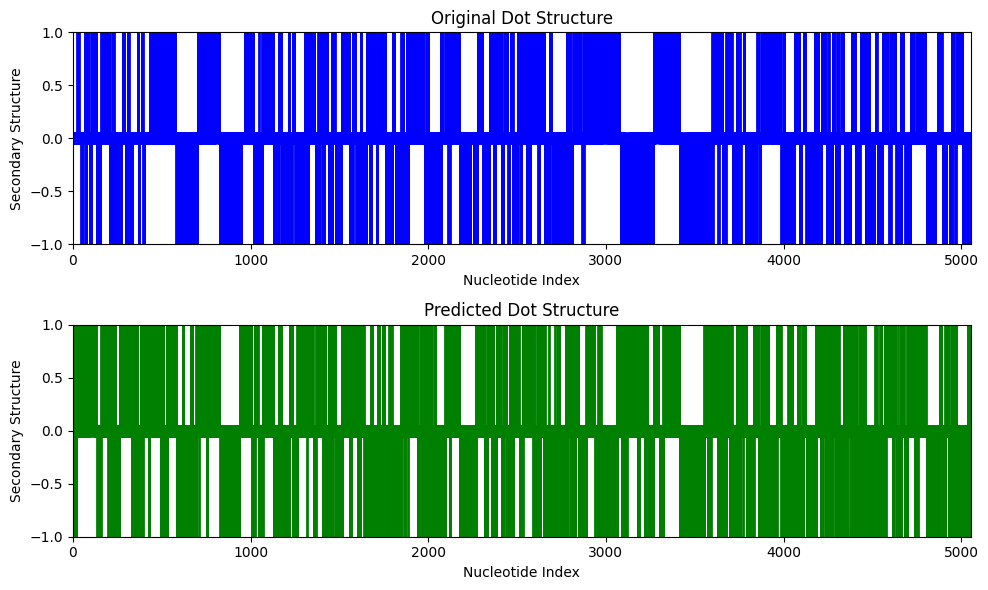

Similarity Score: 1635


In [4]:
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

def dot_bracket_to_tree(dot_bracket):
    stack = []
    root = TreeNode(None)
    current_node = root

    for char in dot_bracket:
        if char == '(':
            new_node = TreeNode(None)
            current_node.children.append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif char == ')':
            current_node = stack.pop()
        else:  # Unpaired base
            current_node.children.append(TreeNode(char))

    return root

def print_tree(node, depth=0):
    if node is None:
        return
    print("  " * depth + str(node.value))
    for child in node.children:
        print_tree(child, depth + 1)

def compare_dot_structures(original_dot_structure, predicted_dot_structure):
    if len(original_dot_structure) != len(predicted_dot_structure):
        raise ValueError("Dot structures must have the same length")

    score = 0
    for orig_char, pred_char in zip(original_dot_structure, predicted_dot_structure):
        if orig_char == '.' and pred_char == '.':
            score += 1  # Both are unpaired
        elif orig_char == '(' and pred_char == '(':
            score += 1  # Both are opening parentheses
        elif orig_char == ')' and pred_char == ')':
            score += 1  # Both are closing parentheses
        elif orig_char == '(' and pred_char == ')':
            score += 1  # Matching base pair
        elif orig_char == '.' and pred_char == '(':
            score -= 1  # Mismatched base pair or unpaired base
        elif orig_char == '(' and pred_char == '.':
            score -= 1  # Mismatched base pair or unpaired base

    return score

def plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure):
    fig, ax = plt.subplots(2, 1, figsize=(10, 6))

    # Plot original dot structure
    ax[0].set_title("Original Dot Structure")
    ax[0].set_xlabel("Nucleotide Index")
    ax[0].set_ylabel("Secondary Structure")
    ax[0].set_xlim(0, len(original_dot_structure))
    ax[0].set_ylim(-1, 1)
    for i, char in enumerate(original_dot_structure):
        if char == '(':
            ax[0].plot([i, i], [0, 1], color='blue', linewidth=2)
        elif char == ')':
            ax[0].plot([i, i], [0, -1], color='blue', linewidth=2)
        elif char == '.':
            ax[0].plot(i, 0, 'o', color='blue', markersize=8)

    # Plot predicted dot structure
    ax[1].set_title("Predicted Dot Structure")
    ax[1].set_xlabel("Nucleotide Index")
    ax[1].set_ylabel("Secondary Structure")
    ax[1].set_xlim(0, len(predicted_dot_structure))
    ax[1].set_ylim(-1, 1)
    for i, char in enumerate(predicted_dot_structure):
        if char == '(':
            ax[1].plot([i, i], [0, 1], color='green', linewidth=2)
        elif char == ')':
            ax[1].plot([i, i], [0, -1], color='green', linewidth=2)
        elif char == '.':
            ax[1].plot(i, 0, 'o', color='green', markersize=8)

    plt.tight_layout()
    plt.show()

# Example usage:
original_dot_structure = ".........................(((((......(......).......)))).).........((....))...((((......((.....)).....))))...(((...((.(..(((((.((((((...))))))..))))....).)))....(((((((((...((((((((.(((....((((((((..(.((((......)))))......(...).(((.......)))...).))))))))))))))))))..)))))))))........(((((((........))))))).....(((((........)))))..)))..................................((....))...............((((....))))..................................((((((((..(((.((...((((((((.(((.....(((((((((((.(..((.(...((((.((....((((.(((..(((((((((((....(((((.((((....(((((((.(((((..(((((((.(((.((((((((.....)))))))).)))...)))))))...))))).))))))).)))).))))).)))))..))))))))))))))))).))...)...)).))))))))))))......))).))).)))))..((((((((.((((((((((.((((.........((((.((((...(((.(((((((....((..(((.(((.(((.(((.((....((.((.(((((.((((((((((((((((((((((((....)))))))))).))))))))).))))).))))).)).)).)))))))))))))).))............)))))))))).....)))).))))...........))))...)))))))))).................(..((((((.(((((((..((((((...(((((((((((((((((((....))))))).).))))))))))).))))))..(....)....)))))))...((((.((((..((((((((((((((((...((.(((...(((.((((((((((.(((((....))))))))).)).))).).)))..)))))..((((((.((((....)))).)))))).))).))))))))))).))....)..))).((....))...)))).......((((((((.....)))))))).......)))))).)....))).)))))..)))))...))))))))..((((........))))((((((....(((((((((((((..(((.(.((((........)))).)...)))...((....))...((((((((....))))))))..(((((...(((..(((...........)))..)))....))))).(((((((((.((((......))))))))))).))....)))))))))))))..((.(...((((((.....((((((((((.((((...(((((((....)))))))...).)))...(((..((.((........)))).)))..).)))))))))...((.......))......))))))......).))..((((((....(.(((....))).)((.(((((((.............((......))....((.((((((((....(((....(((..(.(((....((((.(.....).))))..))).)..)))..)).)....))))))...(((((((((.(......))))))))))...)).)).)))))))..))..((((.(((((.....))))).))))....(((......)))...(((((((...(((......(.(.((((((................(((.((((((((((.......(((((.(((...((.........))...)))(...)(...((......)).).)))))...)))))))))))))..................)))))))))))...)))))))((((((.(((...................((((.........))...)).(((.(.(((.((((((.((.(((((..((.((.((.((((((((((.((((((.....)))))).))))).)..)))).)).)))).))))).)).)))))).)))..).))).......................)))))))))....)))))).(.((((((((.((......((((..(((....))).))))...))))))))))..).....))))))(((..(.((.....((((((.......)))))).(((.....((((..((...((((((...((.....)).))))))......(((.((...((....(((....)))..........((.(((((((((...)))))))))))......))....))...(((((........)))))..((((....((((...((((((((....))))))))..(((....)))...(...((((((...(((((((((((((((((((((((.......))))))....(((((.((((.((((.....(((.....))).....))))))))..))))).....((((((((....).))))))))))).).)))))))))))).........))))))...)..........)..))).)))).)))..)).....((......)).)))).((((.....))))..)))....((((.....(((((((.((...............(((((....(....).....)))))((.(((((((((((...((((((...(((((((....((((((..((((.((.((((((.(((((...(.((((((((((((((((..(((((((...((((((((((((.(((((((((((((.(((((((((.(((((.((((((((..((((((((.(((..((.((..(((((((.(((((((((((((.(((((((......)))))))....))).)))))))).)).))))))))))))))))))))))..))))..))))))))))).)))))))....)).)))))))).).))....)))))))))))))))))))....))))))..)))))))))).)...))))).)))).)))).)))).))))))....))))))).....((((((((((((((((((((((((((.((((((((((.((((((.(((..((((((((.((...((((.((((((.((((((.(((..(((((.(((((((((..(((((((((.((((((.(((.((.(((((((((.((.....))))))))))).)))))))))))))).)))))).))))))))))))))....)))))))))))))))..)))))).)).)).))))..))).))))))....))))))))))....))))))))..))))..)..))))))))).)))).))))))........)))))..)))))).))(...).......(((((((((...((.........))...(((((((....((((.....))))......)))))))...(((.(((..((((((.(...(......((((....))))......).)))))..)))))(((((.........)))))(...)...............(((((.......)))))..........)))....)).))))))).....)).)))))))..)))))).).)))....(((((........)))))....(((((..(((.((......((((.((((((..(((((.(((((((((.((((((((((((.((((..........(((((..(((((.((...((.((((((...((((....)))).)))))).)).(((....)))..)).)))))............))))).)))).)).))))))))))...(((((.....((((..((.((((((....))))))))..............(((((((((((.....)))))))))))..))))..)))))....)))))))))..)))))..(((.......)).)((((((...........))))))..((...(((((((.(.((((((.......))))))...).((......))....)))))))...(((..((((.......))))..))).(((....))).))..........((((((..(((.........)))))))))..........))))..)))))).......((.(.(.((((((...((.......))...))))))...)).).)........((((.((((((..(.(.(((((......)))))...).).(((.(.....).))).....)))))..)...))).).....(((((((....))).))))....))..))).))))).....((((((.(..(((..(.(((((......(....).....))))).)((((....((((....((.(((((((....)))))..)).))...))))...)))).((((...((((.............))))...))))..)))...).))))))......((((((.((..(((................(((((..(((((...(((((((((((((((((((..(((..(((.(((((.......))))))))))).))).)).)))))).)))..)))))))))).)))))..................((((....((((.(((((((......)))))))))))...))))....................)))..)))))))).(((((.(..(.......)..)....((.(((((((..(.....((((.(..(((((......)))))..)))))....).....)))).))).))..)))))..."
predicted_dot_structure = "((((((....).)).).))..(.(...((((.((((...((.(.(((((((.(.((((.(..((((.(((((..((((((.(...(..((.(.(((((((.((((((((((((((((.(((((((((.(..(.....).))).))))..).)))))..)(.(.(.(..(.((((((.(.(((.(...(((((((....)(...(.(....).))))(.(((((....))).)))(.((((....))))))))))))).)))))((.((.((((((((((.((((..(.((..(((.(((((((..((((((.((..((((((..(.((....)).(..(((((....).))))(.(..((....)))..)).)).)..))).((((....)))..(.(.(.(....(((((((((((.(((.((....)))).(..(((((((...(.(..((((.((((((((....((..(((.((.(((.((.(((.(....)))))))).(((((....))).)))))).)))))))((((.(..((.(((((((.(((..((((((((((.(..(..(..(.(((....)))).)..).))...)))))).).))))).)).)))(((....))))))..).))))))))))))))..))))).))))((.((((((....))))).))).).)).)).)(((((((.(..((....).(.(((((..((((..(((..(((((.((((.(((....)))(..((.((((.(((.(((.(((.((..(...(..(..(.((..(..((((((((.((((((((.((((.(.....)))).)))).))).))))).))))).))..)..)..)..).))))))))))))))).)).....)))))))).).))).))))))))..)).)))..))).)))))...(.((((..(.(((((.(.((.((((((((.(.(..(.(((.(((((((.(.((.((((((((((((....))))))).)))))).)(((((.(.((((.(.(.....)..).)).)).)))))).)))))(.((((.((((((((((((.(.(.(.(((.((((.((.((((((((((((.((((((....))))))))).)).))).).)))..))))))((((.(.(((.(.....))).).))))))).)))))))))))).)))...))))))))).(.(.(((((..((.(.....)))))).)).).)))).).)..))((((((((.(((((((((.((((.(..(.((.(((((((((.((((((((....)((.(.((.(((.((((((((((.(..((((..(.....))))).)).(....)(..(.(((..((...(.(.(((((((.((....).))))))(((((.(.....).)..)))))))...)((((.((((....)).))))))(((((.(((.((.((....))).)).)))).)))))))).)))))))).)))(((.(((((((.(.(((((.(..((.(((((..(.((((((....)))))).(.(((.((..(.((.(((((.(.(.((((((((....)))).(.....))((((.((((.(((..(..((....)).)))...)..))))).))....))))).)))))).(.(.(.((....).))).)))..)).))))))))).)))))(((.(......))))).).).)))(..((.((((....).))))...).)).)).)).))(.....)).(..((((....).)))...))))))))))))).).))))).))..)).).)))))..))(.((((((((..(.....).))(..(((((((.(.(....)(.((((((((.(.(((.((.(.....(.((((.(((((.(..(((...(.(....)))))))))...)(((((((..(.....)).)(..(.(....).)))))(.(((.(.(((....)).).).).)(..(....)...)).))..(..((....).)))..)))))).)))).)))))))).)))).)).))).))))))))).)(....(..(..(..(..(.((....).).)((.(..(...(.(..((((((.((.(((((.((.(((((.(.(.(((((....))))).))))))))))..))).)).))).))).))..).).)))).).).)).)))))).).).))))).)..)))).))).)))))).))((((((((((.((((((.((((((((.(((...(.(.(.(((((....)).))).)..)))))((.(((((..(((..(.(.(....))(.(((..(.....)))))...)).))(..(((((.(..((((.(.((.(.....)).)..))))..)(.(.(.((..((....))).))).)..).)))).)(.((((((.(.....)).)(...((..(...(.((((...(((.(.(((....).)).)))))).)).)..)(((((((((.((.(((((((((((.((...((((.(((((((((..(((((..(.....))(..(.....).))).)).))(.(....((.(.....))((((((.(.((((((((....))).)(....))).))..))).))))(.....)).)))))).))))).))))).))..)(.....)))).)))))(...((((((....).))...).)))))))).)))))).)))).))))((((.((....).(.((((((.(......))).)))(((((....))).)).)).(.(.(..(.((((....))).).).....))).)).))))).)))).))).)))).))(...(..((((..((((((((.(((.(((..(.(.(.(.(.(.((....)...).).).)..)).))))(.....)).(.((....).).)))))).))).)))).))).))))..))))).))).))).)))))))))).))))).)))))))).).).).).).))))))))((((((.(((((((.(((((..(.(....))).).))))(((....)))))))))(((((((.((.(.((.(((((((.(.(((((.((.(.((((((((((((((((((..(....))))))).(.(.(((.(((((((((((((((((((....))))(.(.(.(.((....)).)))...)))..)))).)).).))))..).((((.(((((.(((((.(((.(.(.(.(.....))..).)))))).)))).))).(.(.(..(.(.((.(.(..(.(.((((((.((.(..((((.((((.(..(...(..(.((((((..((((((.((.(((((((((.((.(....))))))))))..)))))).).))))).))))).).)...)))))).)).)...))))))))).)..)))))..)..)..)..).).))))).)))....).).))))))))...))))).))))))))....))).)((.(((((.((((((((....)))..).))(..(....)(.(((((.(((.((((((((.((..(.(((((....))).))(.((((((((....)..)))(..(.(.....)).)))))).((.(.(((.(.((.(.(.(....))(.(((((....)))).))..)).)))).)))))).(((((((....).)))).)))(...(.......).((((((((.(..(((.((.(....))).)))..)))).)))))))))).))))))).)))(((.(.(..((...((.(.(((..((....))).)).))))))(((....)..)(..(.(....)..)))((((.(((((((.(....))..).).))).))..))....).))..)))))))))))))).(((((((((((((.(.(((((....))))))))))).)))..).)))))))))))...))..))((((((((....)).).)((....)))..)))..))))..)))..)))))))))(((.((....).))))).)))))(....).)).((((((((.(......))))))))))..))))))))))).).))..)).)).)))..))))..)))))(.(.((((((.(.(((.((.((((....)).))))((((((((((((.((....)((....).).).)).)))((((.(((....))...)))((.(...((....)((....).).).)(((((....).(.....))))))))))).).)))))))(((....).))..)))))((.(((.(((((((....)).)))))((((.(.(....).)))).))(.(((((....))))))))))))).(.(....)))))))))))((((((((..(..(....)))).))...).).)).)))))))).))..).)))))..)....))).))(.(((((((....))).)))))))))...(.((((....).)))))..).)).(((....)(((((.(((((.(..(.(((.(.((((((.(((.(....)))(.((.(((((((....)))))).).(......).)..)).)).(((((.(((((.(((....).)).)))).))))))(((...(.(.((((.(.((((.((((.(((.(.(.((....))(..(((....)))).).(..(..(((((((((((((((..(...((((((((.(((((..(.....))))))))))).).).)))).)))).)))..))))).)).).)))).)))...)))).))))))).)))))))(((.(.(.(((....)).)..)..)))))).)((..(.(.(.((.((((....))))))..)..)(.(...(.....).)).)(.(((..((....))))))))))).)...)))).).)))))))..).)).)))..).))))))))).)))))..))).(((((....)))))"
plot_dot_structure_comparison(original_dot_structure, predicted_dot_structure)

# Calculate similarity score
if len(original_dot_structure) == len(predicted_dot_structure):
    similarity_score = compare_dot_structures(original_dot_structure, predicted_dot_structure)
    print("Similarity Score:", similarity_score)
else:
    print("Dot structures must have the same length for comparison.")
